## Simple Linear Regression

In this notebook, we will try to capture the linear relationship between 2 variables x and y. We won't use any external libraries except a few and will code everything from scratch understanding the basics.

First, let's define two variables x and y.

In [8]:
!pip install tqdm # We will install this to better visualize the progress


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
x = [i for i in range(-7,17,10)]
y = [2*x_i - 7 for x_i in x]

Here, we have generated synthetic data for x and y. We have established that y = 2*x - 7. Let's find out if we can calculate this relationship using linear regression.

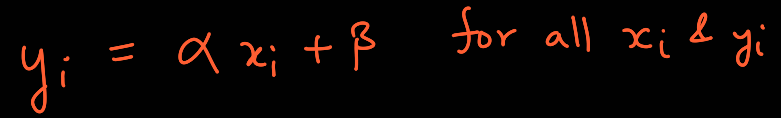

### Cost Function

We know that we want to calculate the value of Alpha and Beta for all x and y. In real world data, we want the best values for alpha and beta so that it satisfies all the pairs of points pretty well. How can we find these values?

We can do this creatively. Let's define a cost function and then try to minimise it. Let us define some error for each point.

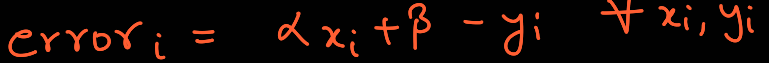

If we just simply add the errors of each point, it won't work. It may happen that the positive error of one point may cancel out the negative error of some other point. What we can do is, we can take the square of each error and then add it! This can be a good candidate for our cost function which we want to minimise. 

We could also have thought about taking the absolute value of each point and then adding it. But in this case, the cost function would not have been differentiable.

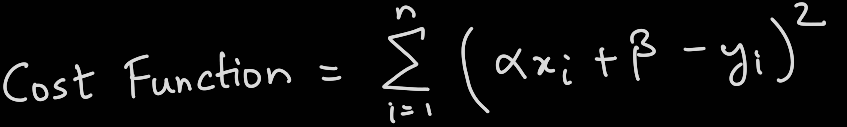

### Gradient Descent

Okay, so after calculating the cost function, we need to find the best values of alpha and beta so that the function is minimised. How can we do this? We can do this using Gradient Descent. 

We need to find the gradient at a particular point and then take a step towards that point. For this, we need to calculate the partial derivative of the function w.r.t to alpha and beta. Let's see what is that.

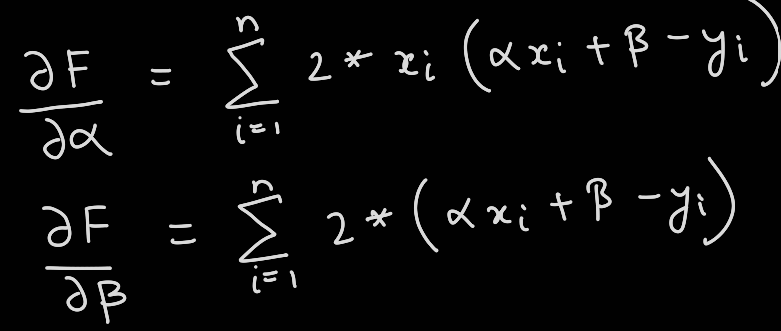

Awesome! We are now well-equipped to get to the coding part!

In [71]:
import random
from tqdm import tqdm

def my_cost_fn(x,y, theta):
    """returns the cost function value at a particular theta for all the data points"""
    return sum([(theta[0]*x_i + theta[1] - y_i)**2 for x_i,y_i in zip(x,y)])

def my_gradient_cost_fn(x,y, theta):
    """returns the gradient cost function value at a particular theta for all the data points"""
    derivative_alpha = sum([2*x_i*(theta[0]*x_i + theta[1] - y_i) for x_i,y_i in zip(x,y)])
    derivative_beta = sum([2*(theta[0]*x_i + theta[1] - y_i) for x_i,y_i in zip(x,y)])
    return [derivative_alpha, derivative_beta]

def step(theta, grad, learning_rate):
    grad = [learning_rate*g_i for g_i in grad]
    theta = [t_i+g_i for t_i,g_i in zip(theta, grad)]
    return theta

epoch_history = []

def linear_regression(cost_fn, gradient_cost_fn, x, y):
    """This function implements the linear regression technique"""
    epochs = 1000
    learning_rate = 0.001
    theta = [random.random(), random.random()]
    
    for i in tqdm(range(epochs), desc=f'Running on {epochs} epochs'):
        print(f"Epoch number {i}:")
        cost_fn_value = cost_fn(x,y, theta)
        gradient_cost_fn_value = gradient_cost_fn(x,y, theta)
        epoch_history.append((i,cost_fn_value))
        print(f"cost function value: {cost_fn_value}, alpha: {theta[0]}, beta: {theta[1]}")
        theta = step(theta,gradient_cost_fn_value,-learning_rate)
    
    return theta


In [72]:
linear_regression(my_cost_fn,my_gradient_cost_fn, x, y)

Running on 1000 epochs: 100%|██████████| 1000/1000 [00:00<00:00, 75514.54it/s]

Epoch number 0:
cost function value: 396.8555590046812, alpha: 0.6589947875939144, beta: 0.5442163351158301
Epoch number 1:
cost function value: 223.27316659182068, alpha: 1.1320152599941924, beta: 0.5230891309284447
Epoch number 2:
cost function value: 170.55389426762974, alpha: 1.3906647276001172, beta: 0.4935743214629785
Epoch number 3:
cost function value: 153.78228566416553, alpha: 1.5324186034833303, beta: 0.45958091043739857
Epoch number 4:
cost function value: 147.71047153983466, alpha: 1.6104281011140251, beta: 0.42323989011207425
Epoch number 5:
cost function value: 144.83143080738165, alpha: 1.6536754251862404, beta: 0.38571274495134933
Epoch number 6:
cost function value: 142.91299530737558, alpha: 1.6779639527425632, beta: 0.34763231082828894
Epoch number 7:
cost function value: 141.29135984040428, alpha: 1.6919109366025302, beta: 0.30934316581395305
Epoch number 8:
cost function value: 139.7690387483118, alpha: 1.7002151944003303, beta: 0.27103270996022377
Epoch number 9:

[1.998468764704594, -6.961827831021246]

We see that the values of theta converge to 2 and -7 which is correct! That is super awesome!
Now, let's try to plot these epoch history using matplotlib


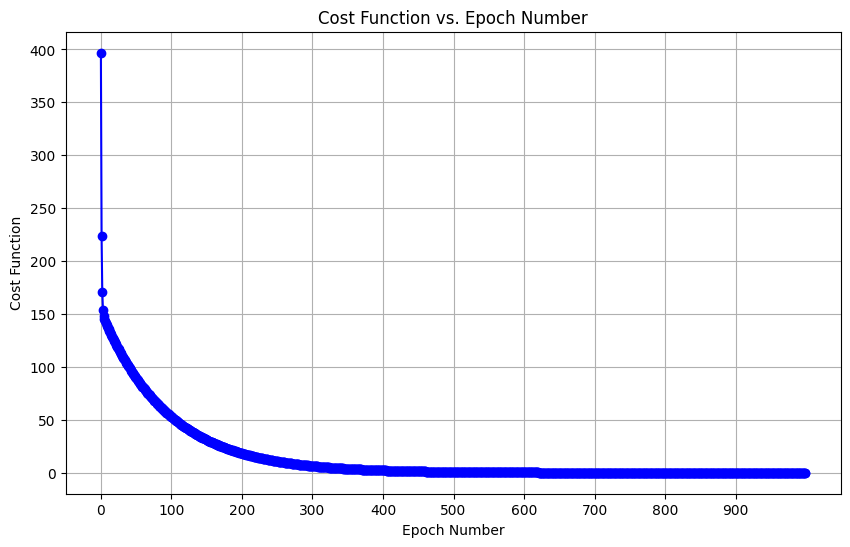

In [74]:
import matplotlib.pyplot as plt

x_values, y_values = zip(*epoch_history)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')

plt.xlabel('Epoch Number')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epoch Number')

plt.grid(True)
plt.xticks(range(min(x_values), max(x_values) + 1,100))

plt.show()


A very important step while implementing is to ensure that your cost function doesn't grow too large. Several techniques like Data Normalisation and Standardisation is used to prevent this